# Exercise 02 : Bar

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
df = pd.read_sql("""
                 SELECT timestamp
                 FROM checker
                 WHERE uid LIKE 'user_%'
                 """, con)

In [4]:
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

In [6]:
df

,timestamp,date,hour
0,2020-04-17 05:19:02.744528,2020-04-17,5
1,2020-04-17 05:22:35.249331,2020-04-17,5
2,2020-04-17 05:22:45.549397,2020-04-17,5
3,2020-04-17 05:34:14.691200,2020-04-17,5
4,2020-04-17 05:34:24.422370,2020-04-17,5
...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20
3203,2020-05-21 20:22:41.785725,2020-05-21,20
3204,2020-05-21 20:22:41.877806,2020-05-21,20
3205,2020-05-21 20:37:00.129678,2020-05-21,20


### night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59

In [7]:
arr = df['hour']
bin = [-1, 3, 9, 16, 23]
labels = ['night', 'morning', 'afternoon', 'evening']

In [8]:
df['daytime'] = pd.cut(arr, bin, labels=labels)
df

,timestamp,date,hour,daytime
0,2020-04-17 05:19:02.744528,2020-04-17,5,morning
1,2020-04-17 05:22:35.249331,2020-04-17,5,morning
2,2020-04-17 05:22:45.549397,2020-04-17,5,morning
3,2020-04-17 05:34:14.691200,2020-04-17,5,morning
4,2020-04-17 05:34:24.422370,2020-04-17,5,morning
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,evening
3203,2020-05-21 20:22:41.785725,2020-05-21,20,evening
3204,2020-05-21 20:22:41.877806,2020-05-21,20,evening
3205,2020-05-21 20:37:00.129678,2020-05-21,20,evening


In [9]:
df = df.groupby(['date', 'daytime'], observed=False).size().unstack(fill_value=0)
df

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


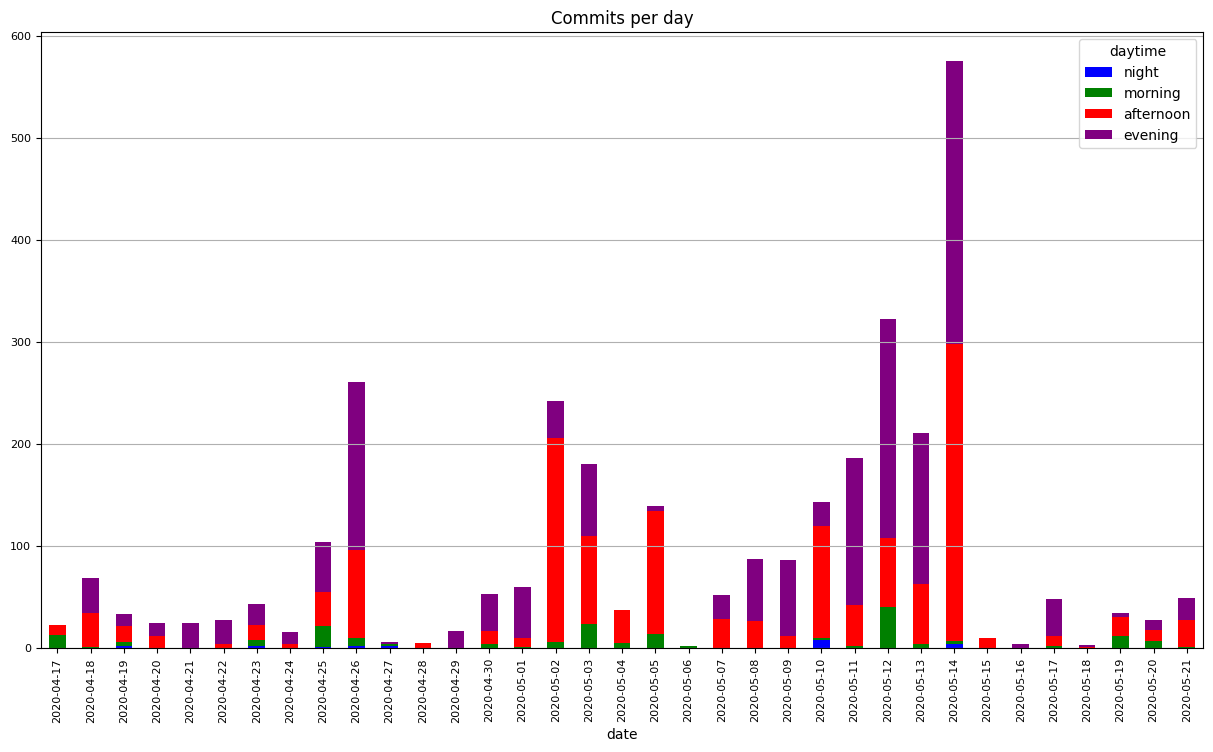

In [10]:
plt = df.plot(
    kind='bar',
    title='Commits per day',
    stacked=True,
    figsize=(15, 8),
    fontsize=8,
    color=['blue', 'green', 'red', 'purple'],
)
plt.grid(axis='y')

### When do our users usually commit the labs: in the night, morning, afternoon,
or evening?

In [11]:
print("night :", df['night'].agg('sum'))
print("morning :", df['morning'].agg('sum'))
print("afternoon :", df['afternoon'].agg('sum'))
print("evening :", df['evening'].agg('sum'))

night : 21
morning : 184
afternoon : 1391
evening : 1611


### Which day has:

the most number of commits
and at the same time, the number of commits in the evening is higher than in the afternoon?

In [12]:
df[df['evening'] > df['afternoon']].max(axis=1).sort_values(ascending=False)

date
2020-05-12    215
2020-04-26    165
2020-05-13    148
2020-05-11    144
2020-05-09     74
2020-05-08     60
2020-05-01     50
2020-04-25     49
2020-04-30     36
2020-05-17     36
2020-04-18     35
2020-04-21     25
2020-04-22     24
2020-04-23     20
2020-04-29     17
2020-04-20     13
2020-04-24     12
2020-05-16      4
2020-04-27      2
2020-05-18      2
dtype: int64

#### Answer:
* afternoon, evening
* 2020-05-12

In [13]:
con.close()